In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-dataset/travel.sqlite


In [20]:
#Code by Dima Rudov https://www.kaggle.com/dimarudov/data-analysis-using-sql/notebook

#Imports 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "../input/airlines-dataset/"  #Insert path here
database = path + 'travel.sqlite'

In [21]:
import sqlite3

#Aircrafts_data

In [22]:
#Code by Dima Rudov https://www.kaggle.com/dimarudov/data-analysis-using-sql/notebook

conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


In [23]:
flights = pd.read_sql("SELECT * FROM flights;", conn)
seats = pd.read_sql("SELECT * FROM seats;", conn)
aircrafts = pd.read_sql("SELECT * FROM aircrafts_data;", conn)
bookings = pd.read_sql("SELECT * FROM bookings;", conn)
tickets = pd.read_sql("SELECT * FROM tickets;", conn)

In [50]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,departure_delay,arrival_delay
0,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,319,NaT,NaT,NaN,NaN
1,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,CR2,NaT,NaT,NaN,NaN
2,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,763,NaT,NaT,NaN,NaN
3,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,763,NaT,NaT,NaN,NaN
4,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,SU9,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,0.0,0.0
33117,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,5.0,5.0
33118,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,CR2,NaT,NaT,NaN,NaN
33119,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,1.0,2.0


In [51]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


#List of Aircrafts Ranges

ORDER BY defines the sorting of the output - ascending or descending (DESC)

LIMIT, limits the number of rows in the output - after the sorting

In [24]:
AirRange = pd.read_sql("""SELECT *
                        FROM aircrafts_data
                        ORDER BY range
                        LIMIT 10;""", conn)
AirRange

,aircraft_code,model,range
0,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
1,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
6,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
7,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
8,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100


#Acknowledgements

Dima Rudov https://www.kaggle.com/dimarudov/data-analysis-using-sql/notebook

In [25]:
tables = pd.read_sql("""
    SELECT *
    FROM sqlite_master
    WHERE type='table';
""", conn)
print("Tables in database:\n", tables["name"].tolist())

Tables in database:
 ['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


In [26]:
flights = pd.read_sql("SELECT * FROM flights;", conn)
seats = pd.read_sql("SELECT * FROM seats;", conn)
aircrafts = pd.read_sql("SELECT * FROM aircrafts_data;", conn)
bookings = pd.read_sql("SELECT * FROM bookings;", conn)
tickets = pd.read_sql("SELECT * FROM tickets;", conn)

In [27]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [28]:
flights = flights.replace("\\N", pd.NA)
flights_clean = flights.dropna(subset=["actual_departure", "actual_arrival"])

In [29]:
flights_clean

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
26,1,PG0405,2017-07-16 09:35:00+03,2017-07-16 10:30:00+03,DME,LED,Arrived,321,2017-07-16 09:44:00+03,2017-07-16 10:39:00+03
27,2,PG0404,2017-08-05 19:05:00+03,2017-08-05 20:00:00+03,DME,LED,Arrived,321,2017-08-05 19:06:00+03,2017-08-05 20:01:00+03
28,3,PG0405,2017-08-05 09:35:00+03,2017-08-05 10:30:00+03,DME,LED,Arrived,321,2017-08-05 09:39:00+03,2017-08-05 10:34:00+03
39,14,PG0402,2017-08-06 12:25:00+03,2017-08-06 13:20:00+03,DME,LED,Arrived,321,2017-08-06 12:28:00+03,2017-08-06 13:23:00+03
40,15,PG0402,2017-07-28 12:25:00+03,2017-07-28 13:20:00+03,DME,LED,Arrived,321,2017-07-28 12:31:00+03,2017-07-28 13:26:00+03
...,...,...,...,...,...,...,...,...,...,...
33113,33114,PG0063,2017-07-17 19:25:00+03,2017-07-17 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-17 19:32:00+03,2017-07-17 20:17:00+03
33114,33115,PG0063,2017-08-08 19:25:00+03,2017-08-08 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-08 19:27:00+03,2017-08-08 20:12:00+03
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03


In [30]:
print(flights.shape)
print(flights_clean.shape)

(33121, 10)
(16715, 10)


In [31]:
print("Flights before cleaning:", flights.shape)
print("Flights after cleaning:", flights_clean.shape)

Flights before cleaning: (33121, 10)
Flights after cleaning: (16715, 10)


In [32]:
AirRange = pd.read_sql("""
    SELECT *
    FROM aircrafts_data
    ORDER BY range DESC
    LIMIT 10;
""", conn)

print("\nList of Aircrafts with shortest range:")
print(AirRange)


List of Aircrafts with shortest range:
  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...   6700
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
5           733    {"en": "Boeing 737-300", "ru": "Боинг 737-300"}   4200
6           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
7           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...   2700
8           CN1  {"en": "Cessna 208 Caravan", "ru": "Сессна 208...   1200


In [33]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            33121 non-null  int64 
 1   flight_no            33121 non-null  object
 2   scheduled_departure  33121 non-null  object
 3   scheduled_arrival    33121 non-null  object
 4   departure_airport    33121 non-null  object
 5   arrival_airport      33121 non-null  object
 6   status               33121 non-null  object
 7   aircraft_code        33121 non-null  object
 8   actual_departure     16773 non-null  object
 9   actual_arrival       16715 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


In [34]:
flights["status"].value_counts()

status
Arrived      16707
Scheduled    15383
On Time        518
Cancelled      414
Departed        58
Delayed         41
Name: count, dtype: int64

In [35]:
print("Flights Data Overview:")
print(flights.info())
print(flights["status"].value_counts())


Flights Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            33121 non-null  int64 
 1   flight_no            33121 non-null  object
 2   scheduled_departure  33121 non-null  object
 3   scheduled_arrival    33121 non-null  object
 4   departure_airport    33121 non-null  object
 5   arrival_airport      33121 non-null  object
 6   status               33121 non-null  object
 7   aircraft_code        33121 non-null  object
 8   actual_departure     16773 non-null  object
 9   actual_arrival       16715 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB
None
status
Arrived      16707
Scheduled    15383
On Time        518
Cancelled      414
Departed        58
Delayed         41
Name: count, dtype: int64


In [36]:
the_topdep = flights["departure_airport"].value_counts()
the_topdep

departure_airport
DME    3217
SVO    2981
LED    1900
VKO    1719
OVB    1055
       ... 
PYJ      27
NYA      27
PKC      26
KXK      18
USK      18
Name: count, Length: 104, dtype: int64

In [37]:
the_topdep = flights["departure_airport"].value_counts().head(10)
the_topdep

departure_airport
DME    3217
SVO    2981
LED    1900
VKO    1719
OVB    1055
KJA     707
SVX     689
PEE     619
ROV     617
BZK     610
Name: count, dtype: int64

In [38]:
the_toparr = flights["arrival_airport"].value_counts().head(10)
the_toparr

arrival_airport
DME    3217
SVO    2982
LED    1902
VKO    1717
OVB    1055
KJA     707
SVX     688
ROV     620
PEE     619
BZK     610
Name: count, dtype: int64

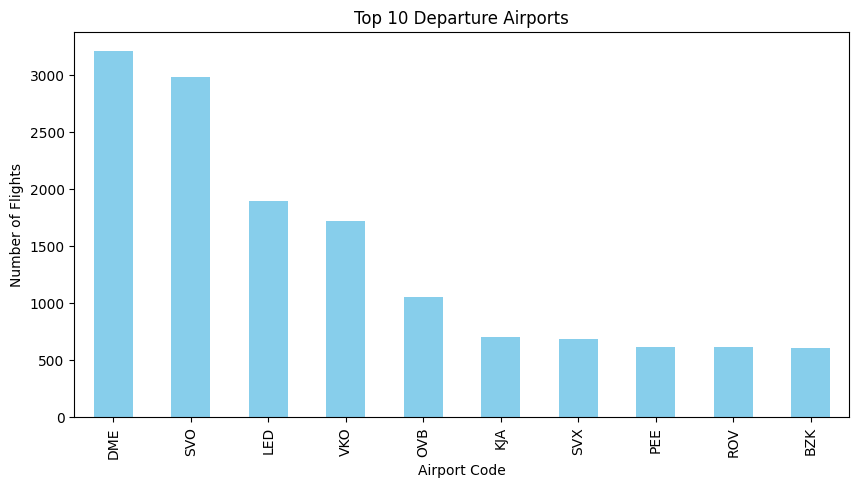

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
the_topdep.plot(kind="bar", color="skyblue")
plt.title("Top 10 Departure Airports")
plt.xlabel("Airport Code")
plt.ylabel("Number of Flights")
plt.show()

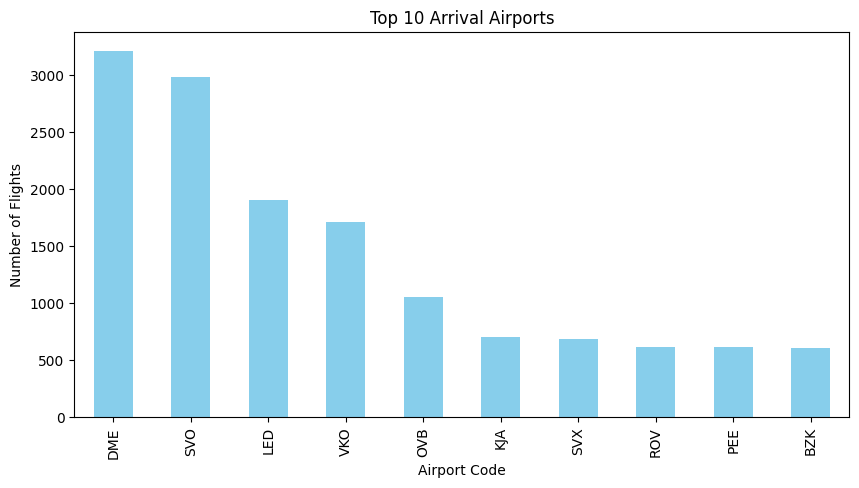

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
the_toparr.plot(kind="bar", color="skyblue")
plt.title("Top 10 Arrival Airports")
plt.xlabel("Airport Code")
plt.ylabel("Number of Flights")
plt.show()

In [41]:
flights["scheduled_departure"] = pd.to_datetime(flights["scheduled_departure"])

In [42]:
# Convert columns to datetime
flights["scheduled_departure"] = pd.to_datetime(flights["scheduled_departure"])
flights["scheduled_arrival"] = pd.to_datetime(flights["scheduled_arrival"])
flights["actual_departure"] = pd.to_datetime(flights["actual_departure"], errors="coerce")
flights["actual_arrival"] = pd.to_datetime(flights["actual_arrival"], errors="coerce")

# Calculate delays in minutes
flights["departure_delay"] = (flights["actual_departure"] - flights["scheduled_departure"]).dt.total_seconds() / 60
flights["arrival_delay"] = (flights["actual_arrival"] - flights["scheduled_arrival"]).dt.total_seconds() / 60

# Summary of delays
print(flights[["departure_delay", "arrival_delay"]].describe())


       departure_delay  arrival_delay
count     16773.000000   16715.000000
mean         12.206522      12.210829
std          41.414736      41.469672
min           0.000000     -12.000000
25%           2.000000       2.000000
50%           3.000000       3.000000
75%           4.000000       5.000000
max         277.000000     277.000000


In [43]:
aircraft_use = flights["aircraft_code"].value_counts().head(10)

In [44]:
aircraft_use

aircraft_code
CN1    9273
CR2    9048
SU9    8504
321    1952
733    1274
319    1239
763    1221
773     610
Name: count, dtype: int64

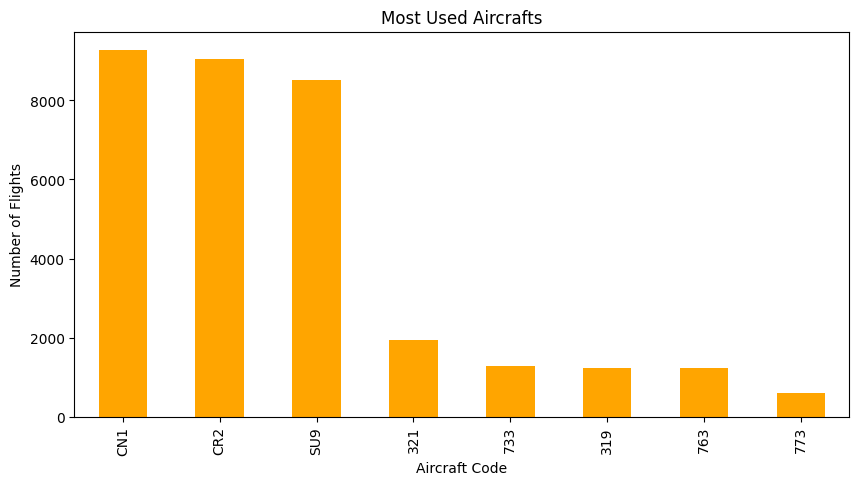

In [45]:
plt.figure(figsize=(10,5))
aircraft_use.plot(kind="bar", color="orange")
plt.title("Most Used Aircrafts")
plt.xlabel("Aircraft Code")
plt.ylabel("Number of Flights")
plt.show()

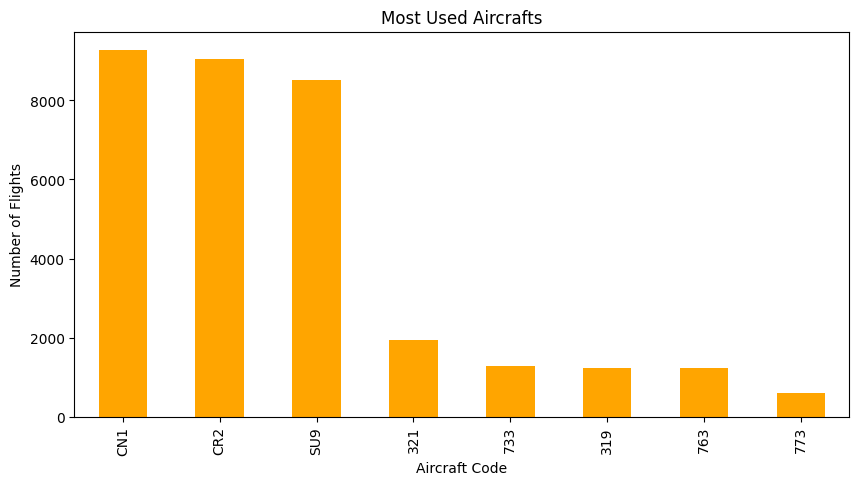

In [46]:
aircraft_usage = flights["aircraft_code"].value_counts().head(10)

plt.figure(figsize=(10,5))
aircraft_usage.plot(kind="bar", color="orange")
plt.title("Most Used Aircrafts")
plt.xlabel("Aircraft Code")
plt.ylabel("Number of Flights")
plt.show()


In [47]:
flights_aircrafts = flights.merge(aircrafts, on="aircraft_code", how="left")
print(flights_aircrafts[["aircraft_code", "model"]].head())


  aircraft_code                                              model
0           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...
1           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...
2           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}
3           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}
4           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...


Top 10 Highest Bookings:
        book_ref               book_date  total_amount
60572    3B54BB  2017-07-05 17:08:00+03       1204500
60004    3AC131  2017-07-31 01:06:00+03       1087100
104461   65A6EA  2017-07-03 06:28:00+03       1065600
221705   D7E9AA  2017-08-08 05:29:00+03       1062800
245752   EF479E  2017-08-02 15:58:00+03       1035100
84188    521C53  2017-07-08 09:25:00+03        985500
83315    514CA6  2017-07-27 05:07:00+03        955000
220807   D70BD9  2017-07-05 12:47:00+03        947500
242807   EC7EDA  2017-07-02 16:13:00+03        946800
146149   8E4370  2017-07-28 02:04:00+03        945700


<Figure size 1000x500 with 0 Axes>

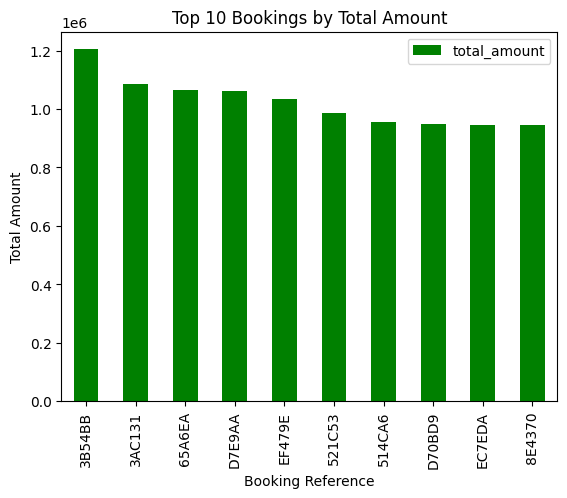

In [48]:
top_bookings = bookings.sort_values("total_amount", ascending=False).head(10)
print("Top 10 Highest Bookings:\n", top_bookings)

plt.figure(figsize=(10,5))
top_bookings.plot(x="book_ref", y="total_amount", kind="bar", color="green")
plt.title("Top 10 Bookings by Total Amount")
plt.xlabel("Booking Reference")
plt.ylabel("Total Amount")
plt.show()

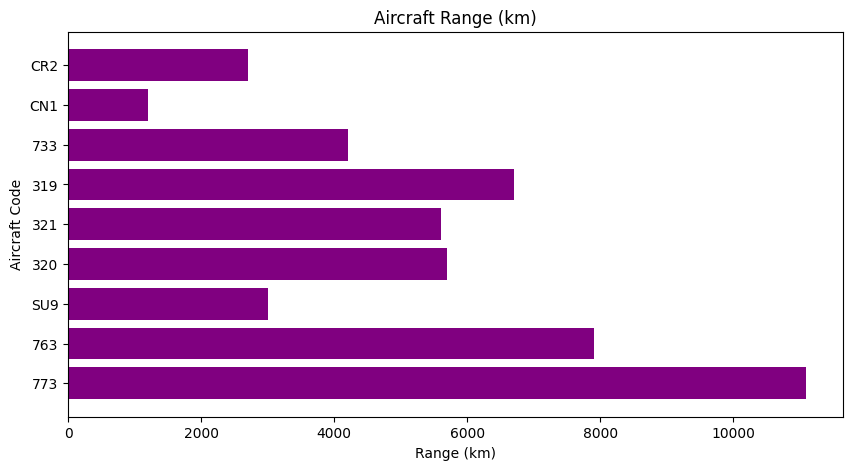

In [49]:
plt.figure(figsize=(10,5))
plt.barh(aircrafts["aircraft_code"], aircrafts["range"], color="purple")
plt.title("Aircraft Range (km)")
plt.xlabel("Range (km)")
plt.ylabel("Aircraft Code")
plt.show()